In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/netflix_titles.csv",encoding='latin1')

In [ ]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]  # Remove unnamed columns
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)
df['duration'].fillna('0 min', inplace=True)

<ipython-input-41-24b07eebaeae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
<ipython-input-41-24b07eebaeae>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [ ]:
df.describe()

,release_year
count,8809.000000
mean,2014.181292
std,8.818932
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2024.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8670 entries, 0 to 8807
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8670 non-null   object
 1   type          8670 non-null   int64 
 2   title         8670 non-null   int64 
 3   director      8670 non-null   int64 
 4   cast          8670 non-null   object
 5   country       8670 non-null   int64 
 6   date_added    8661 non-null   object
 7   release_year  8670 non-null   int64 
 8   rating        8670 non-null   int64 
 9   duration      8670 non-null   object
 10  listed_in     8670 non-null   int64 
 11  description   8670 non-null   object
dtypes: int64(7), object(5)
memory usage: 880.5+ KB


0

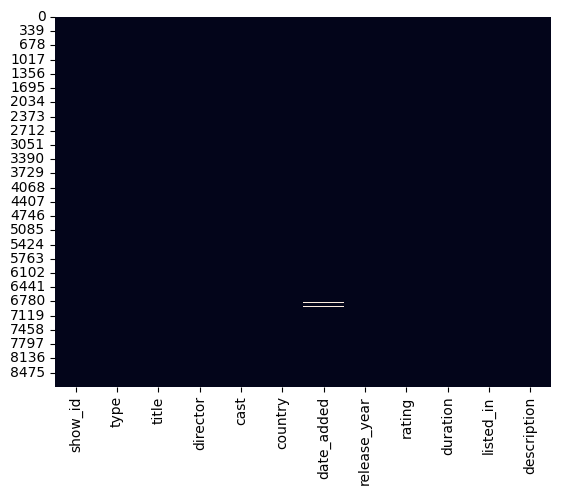

In [ ]:
sns.heatmap(df.isnull(), cbar=False)
df.duplicated().sum()

<Axes: title={'center': 'Top 15 Countries'}, xlabel='country'>

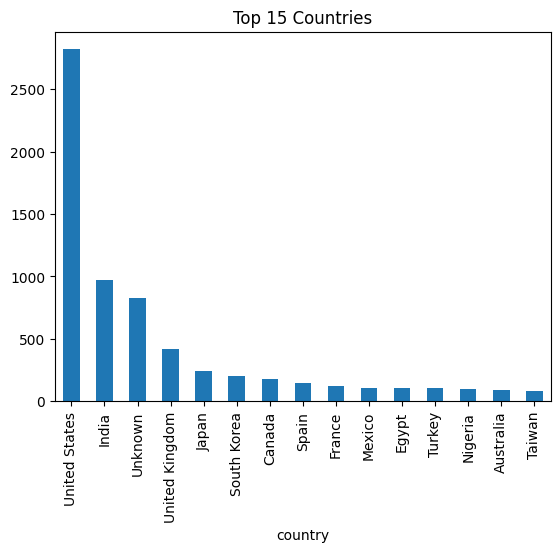

In [ ]:
df.director.value_counts()[:15].plot(kind="bar", title="Top 15 Directors")
df.country.value_counts()[:15].plot(kind="bar", title="Top 15 Countries")

<Axes: xlabel='Year'>

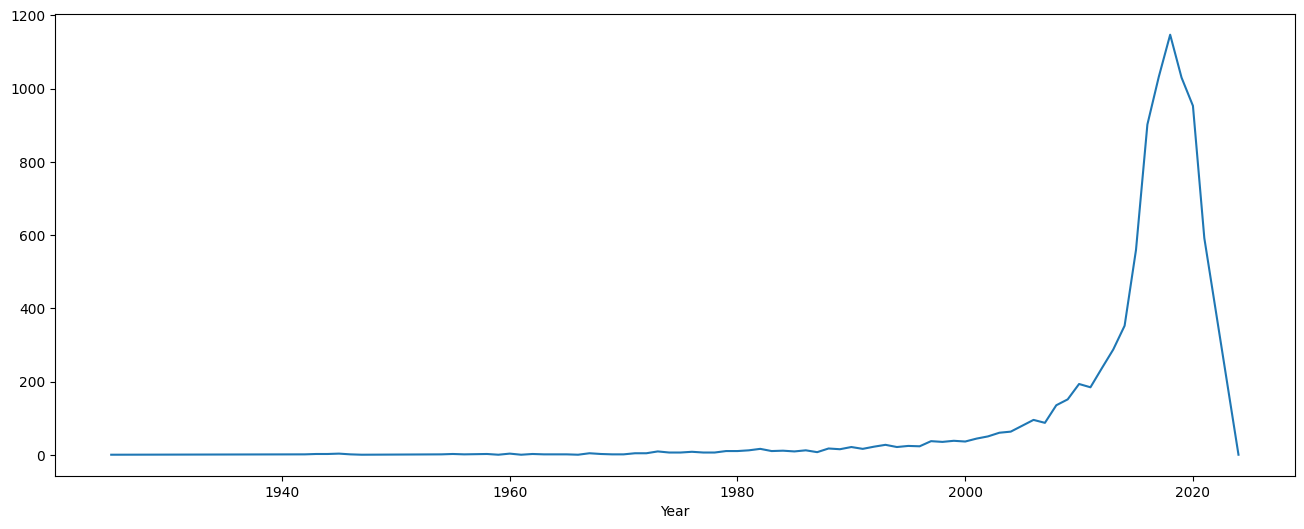

In [ ]:
x = df.release_year.value_counts()
plt.figure(figsize=(16,6))
plt.xlabel("Year")
sns.lineplot(x=x.index, y=x.values)

<Axes: ylabel='count'>

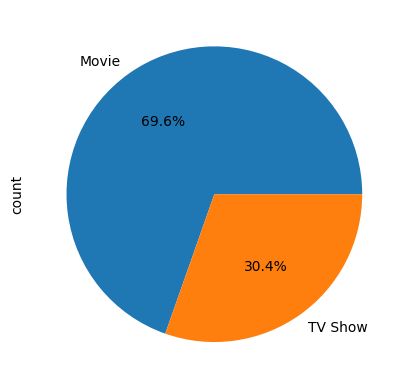

In [ ]:
df["type"].value_counts().plot(kind="pie", autopct='%1.1f%%')

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['type', 'country', 'rating', 'director', 'title', 'listed_in']
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8809 entries, 0 to 8808
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8809 non-null   object
 1   type          8809 non-null   int64 
 2   title         8809 non-null   int64 
 3   director      8809 non-null   int64 
 4   cast          8809 non-null   object
 5   country       8809 non-null   int64 
 6   date_added    8799 non-null   object
 7   release_year  8809 non-null   int64 
 8   rating        8809 non-null   int64 
 9   duration      8809 non-null   object
 10  listed_in     8809 non-null   int64 
 11  description   8809 non-null   object
dtypes: int64(7), object(5)
memory usage: 826.0+ KB


In [ ]:
def remove_outliers(df):
    Q1 = df['rating'].quantile(0.25)
    Q3 = df['rating'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df['rating'] >= lower) & (df['rating'] <= upper)]
    return df

In [ ]:
df = remove_outliers(df)

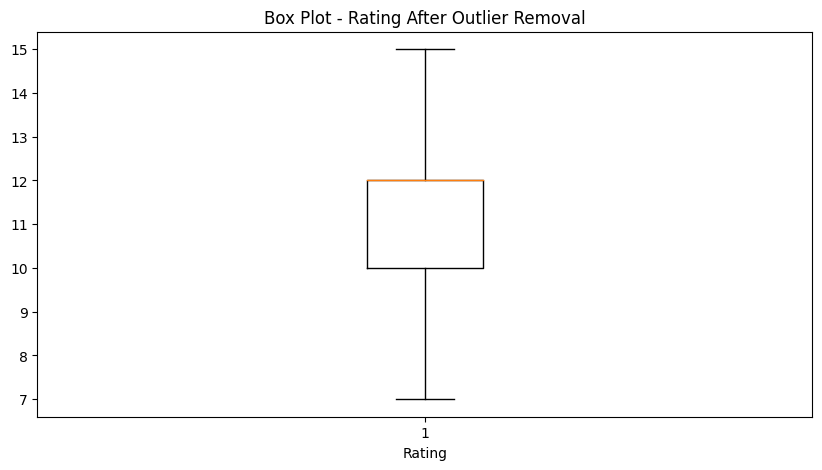

In [ ]:
plt.figure(figsize=(10,5))
plt.boxplot(df['rating'])
plt.title("Box Plot - Rating After Outlier Removal")
plt.xlabel("Rating")
plt.show()

In [ ]:
outlier_index = df[df['director'] == 2493].index  # Adjust based on encoded value for 'Unknown'
df = df.drop(outlier_index)

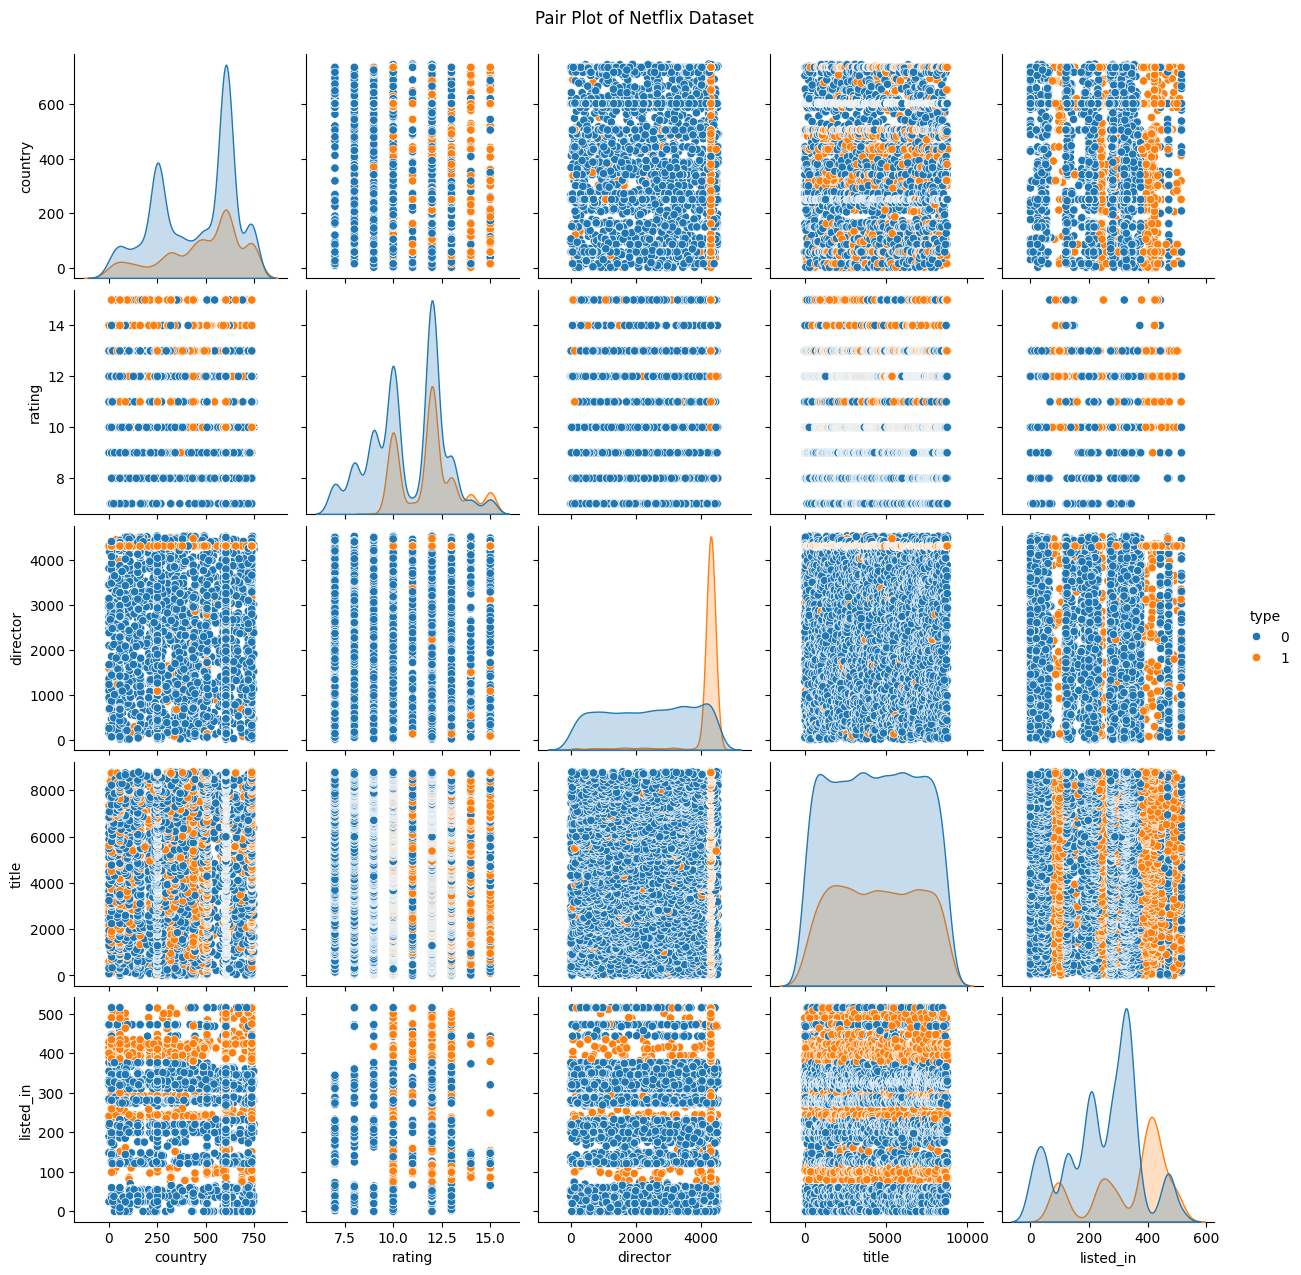

In [ ]:
selected_features = ['type', 'country', 'rating', 'director', 'title', 'listed_in']
df_selected = df[selected_features].dropna()
sns.pairplot(df_selected, hue='type', diag_kind='kde')
plt.suptitle('Pair Plot of Netflix Dataset', y=1.02)
plt.show()

Linear Regression Model Performance
Mean Absolute Error (MAE): 1.5090792811299216
Mean Squared Error (MSE): 3.317147283084885
Root Mean Squared Error (RMSE): 1.8213037316946576
R² Score: 0.0727673204402165


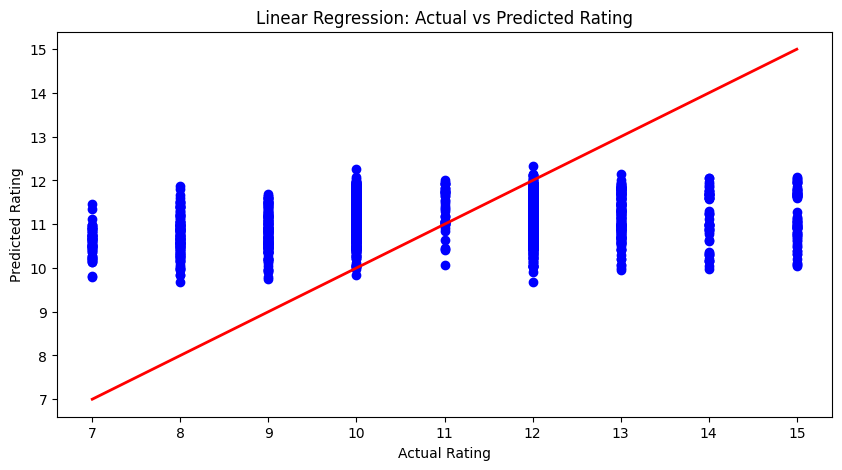

In [ ]:
# Import necessary libraries for Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the feature matrix (X) and target variable (y) for regression
X = df[['title', 'director', 'country', 'listed_in']]  # Same features
y = df['rating']  # Target is now 'rating'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression Model
print("Linear Regression Model Performance")
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_lr))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lr))
print("Root Mean Squared Error (RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R² Score:", r2_score(y_test, y_pred_lr))

# Visualizing the Linear Regression performance
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Perfect fit line
plt.title("Linear Regression: Actual vs Predicted Rating")
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.show()


Logistic Regression Model Performance
Accuracy: 0.8540945790080738
Precision: 0.755834829443447
Recall: 0.7825278810408922
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1196
           1       0.76      0.78      0.77       538

    accuracy                           0.85      1734
   macro avg       0.83      0.83      0.83      1734
weighted avg       0.86      0.85      0.85      1734



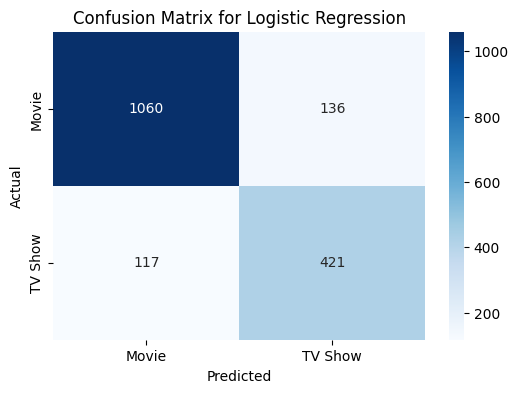

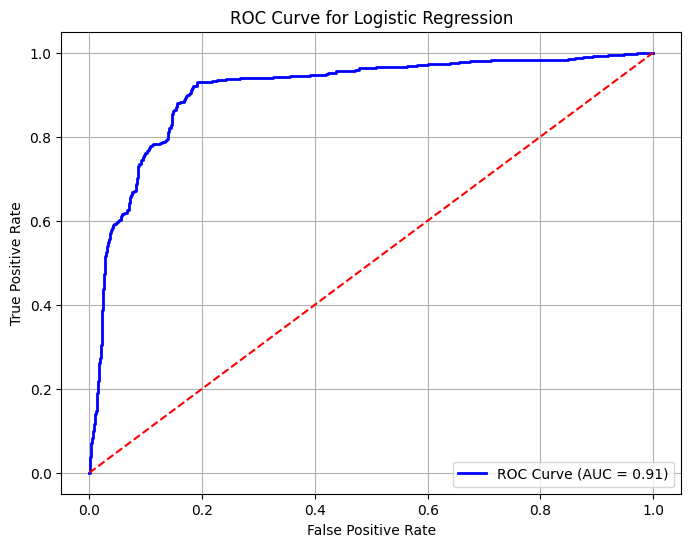

In [ ]:
# Import necessary libraries for Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc

# Define the feature matrix (X) and target variable (y) for classification
X = df[['title', 'director', 'country', 'listed_in']]  # Same features
y = df['type']  # Target is 'type' (binary classification: Movie or TV Show)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the Logistic Regression model
print("Logistic Regression Model Performance")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='binary'))
print("Recall:", recall_score(y_test, y_pred, average='binary'))
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=['Movie', 'TV Show'], yticklabels=['Movie', 'TV Show'])
plt.title("Confusion Matrix for Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve and AUC Score
y_prob = lr_model.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for the positive class (TV Show)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)  # False positive rate, true positive rate
roc_auc = auc(fpr, tpr)  # Calculate the AUC score

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line (random classifier)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, precision_score, recall_score, confusion_matrix
print("Decision Tree Model Performance")
print("Accuracy:", accuracy_score(y_test, dt_pred))
print("Precision:", precision_score(y_test, dt_pred, average='micro'))
print("Recall:", recall_score(y_test, dt_pred, average='micro'))
print(classification_report(y_test, dt_pred))

Decision Tree Model Performance
Accuracy: 0.9971164936562861
Precision: 0.9971164936562861
Recall: 0.9971164936562861
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1196
           1       1.00      0.99      1.00       538

    accuracy                           1.00      1734
   macro avg       1.00      1.00      1.00      1734
weighted avg       1.00      1.00      1.00      1734



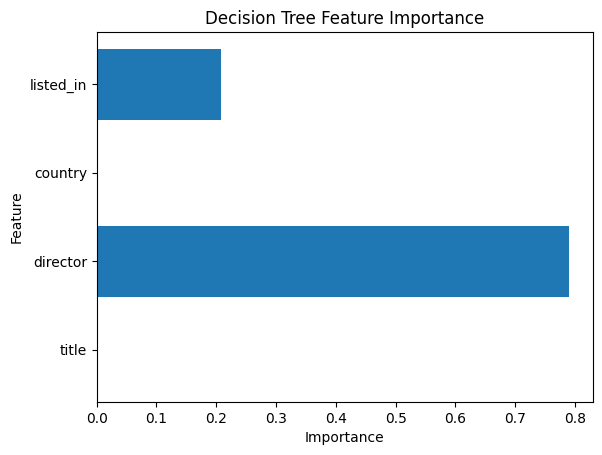

In [ ]:
dt_importance = dt_model.feature_importances_
plt.barh(X.columns, dt_importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Decision Tree Feature Importance")
plt.show()


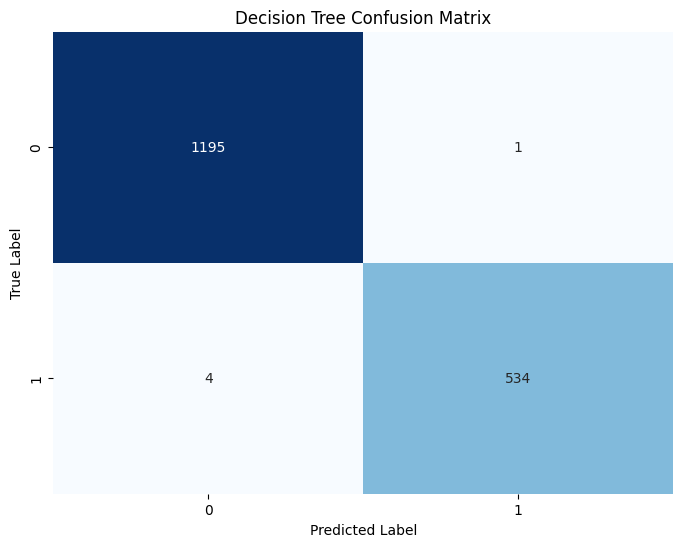

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions made by the Decision Tree model
dt_pred = dt_model.predict(X_test)

# Compute the confusion matrix
dt_conf_mat = confusion_matrix(y_test, dt_pred)

# Plotting the confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(dt_conf_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred, average='micro'))
print("Recall:", recall_score(y_test, rf_pred, average='micro'))
print(classification_report(y_test, rf_pred))

Random Forest Accuracy: 0.994232987312572
Precision: 0.994232987312572
Recall: 0.994232987312572
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1196
           1       0.99      0.99      0.99       538

    accuracy                           0.99      1734
   macro avg       0.99      0.99      0.99      1734
weighted avg       0.99      0.99      0.99      1734



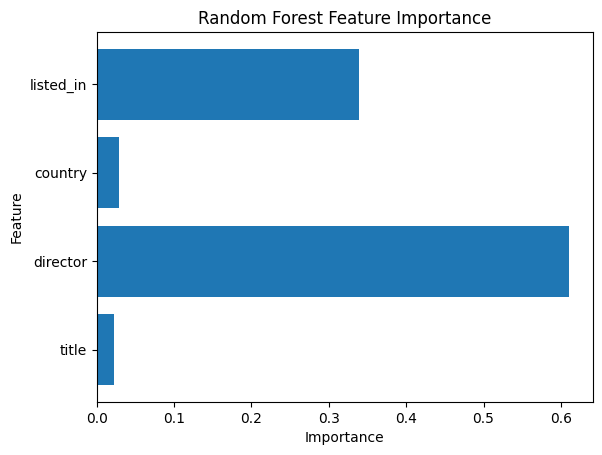

In [ ]:
rf_importance = rf_model.feature_importances_
plt.barh(X.columns, rf_importance)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importance")
plt.show()


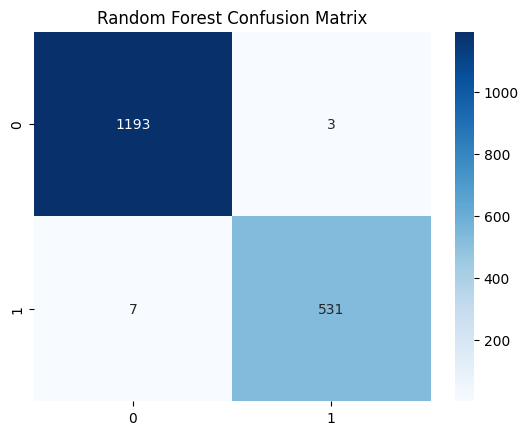

In [ ]:
rf_conf_mat = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_conf_mat, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the learning curve
def plot_learning_curve(estimator, X_train, y_train, cv=None, train_sizes=np.linspace(0.1, 1.0, 5), title="Model Learning Curve"):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, cv=cv, train_sizes=train_sizes, scoring='accuracy')

    # Calculate mean and standard deviation for training and testing scores
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    # Plot the learning curve
    plt.figure(figsize=(10,6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label="Cross-Validation Score")

    plt.title(title)
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

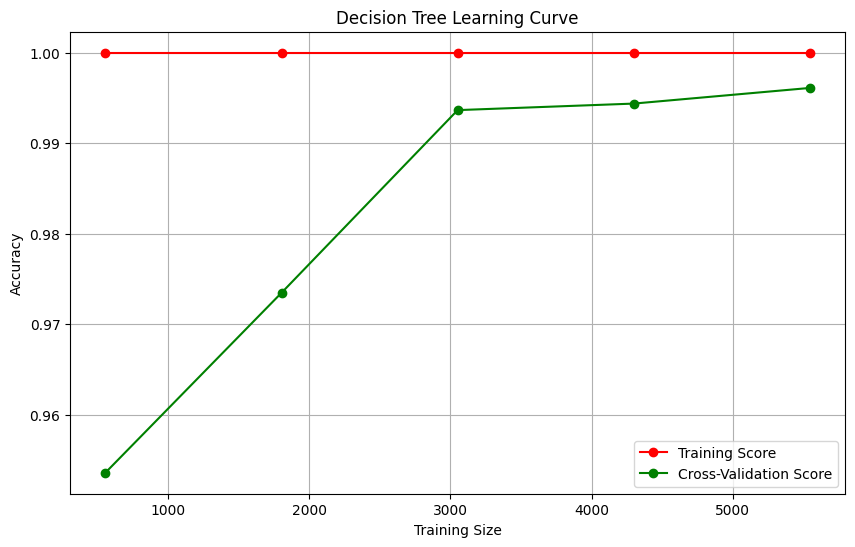

In [ ]:
plot_learning_curve(dt_model, X_train, y_train, cv=5, title="Decision Tree Learning Curve")


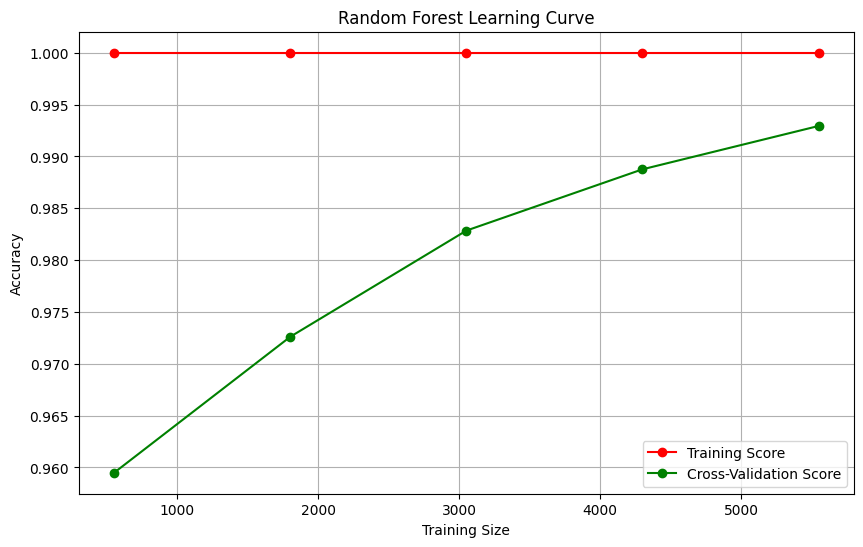

In [ ]:
plot_learning_curve(rf_model, X_train, y_train, cv=5, title="Random Forest Learning Curve")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [ ]:
print("KNN Accuracy:", accuracy_score(y_test, knn_pred))
print("Precision:", precision_score(y_test, knn_pred, average='micro'))
print("Recall:", recall_score(y_test, knn_pred, average='micro'))
print(classification_report(y_test, knn_pred))

KNN Accuracy: 0.8985005767012687
Precision: 0.8985005767012687
Recall: 0.8985005767012687
              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1196
           1       0.80      0.89      0.85       538

    accuracy                           0.90      1734
   macro avg       0.88      0.90      0.88      1734
weighted avg       0.90      0.90      0.90      1734

